In [1]:
import numpy as np
from PIL import Image
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
img = Image.open('img_in/museums-victoria-QF1v2yyUi4E-unsplash.jpg')
img_pxs = np.array(img)

Исходное изображение

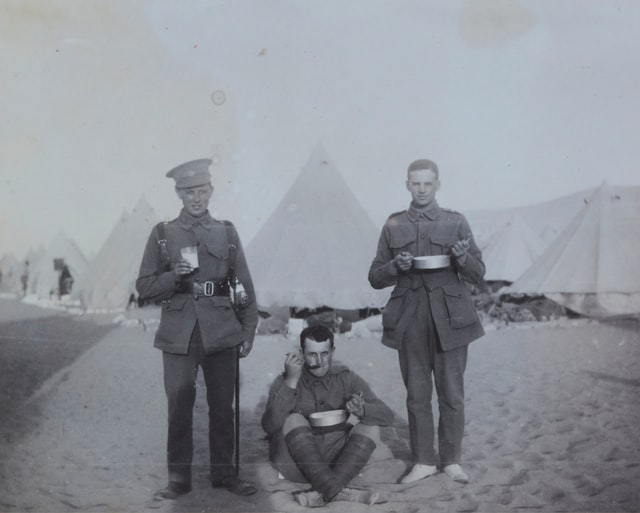

In [3]:
img

In [4]:
def histPlotImage(img: Image.Image):
    """
    The function show hist plot
    :params img input your img in RGB 
    :type img PIL.Image.Image
    """
    img = np.array(img)
    values, bin_edges, patches = plt.hist(img.ravel(), bins=range(256))
    plt.xlabel('brightness')
    plt.ylabel('count pixel')
    plt.title('image hist')
    plt.show()

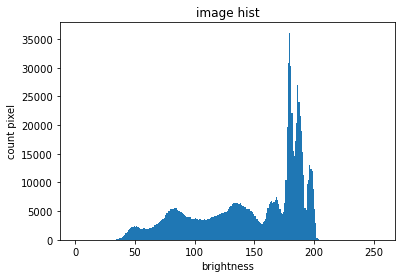

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = plt.subplots()
ax = histPlotImage(img)
plt.savefig('img_out/source_hist-lab1.png')

In [6]:
def thresholdPreprocessing(img: Image.Image)->Image.Image:
    img = np.array(img)
    med = np.mean(img)*0.92
    output_arr = np.where(img<=med, 0, 255)
    output_img = Image.fromarray(np.uint8(output_arr))
    return output_img

In [7]:
def thresholdEachChannel(img: Image.Image)->Image.Image:
    red, green, blue = img.split()
    red, green, blue = list(map(np.array, [red, green, blue]))
    meanred = np.quantile(np.array(red), q=0.35)
    meangreen= np.quantile(np.array(green), q=0.35)
    meanblue= np.quantile(np.array(blue), q=0.35)
    outputred = np.where(red <= meanred,0,255)
    outputgreen= np.where(green <= meangreen,0,255)
    outputblue= np.where(blue <= meanblue,0,255)
    merged_chan = np.dstack((outputred, outputgreen, outputblue))
    output_img = Image.fromarray(np.uint8(merged_chan))
    return output_img

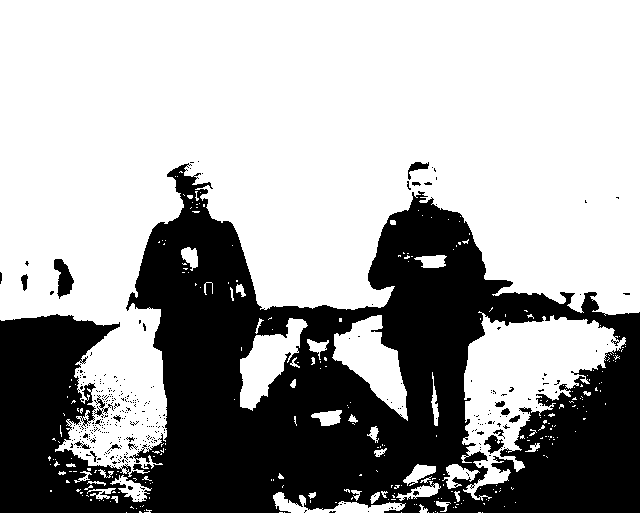

In [8]:
outputTEC = thresholdEachChannel(img)
outputTEC.convert('1')

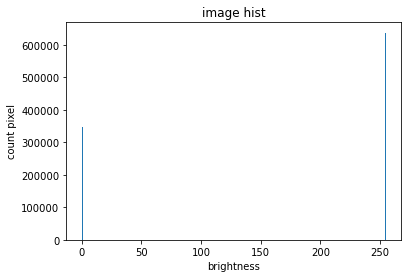

In [9]:
histPlotImage(outputTEC)

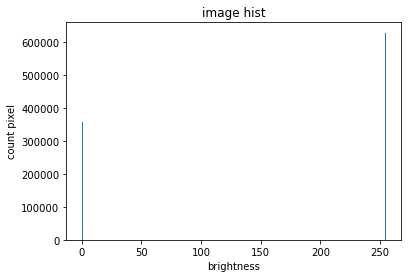

In [11]:
threshold_img = thresholdPreprocessing(img)
histPlotImage(threshold_img)

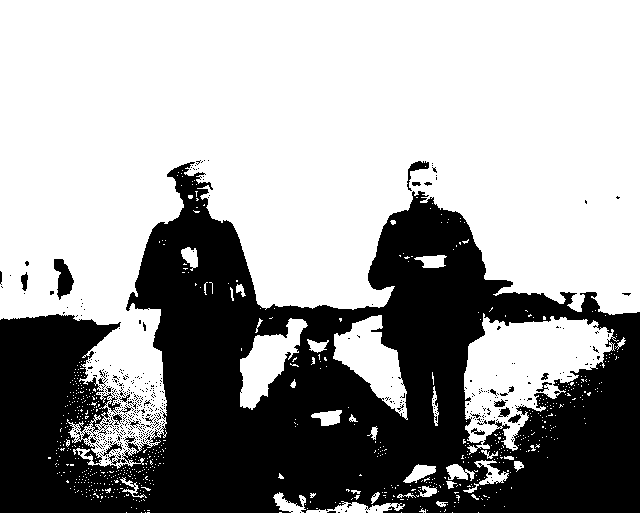

In [12]:
threshold_img.convert('1')

In [16]:
def thresholdValue(img: Image.Image)->tuple:
    """ 
    The function returns threshold values for each channel 
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return tuple(list, list)
    """
    red, green, blue = img.split()
    arrays_chan = list(map(np.array, [red, green, blue]))
    minchan = list(map(np.min, arrays_chan))
    maxchan = list(map(np.max, arrays_chan))
    return minchan, maxchan

In [17]:
def linearContrast(img: Image.Image):
    """
    The function is implemented linear contrasting for RGB channels in the image. 
    It normalizes each image channel
    :params img input your img in RGB 
    :type img PIL.Image.Image
    :return PIL.Image.Image
    """
    red, green, blue = img.split()
    red, green, blue = list(map(np.array, [red, green, blue]))
    minimum, maximum = thresholdValue(img)
    minred, mingreen, minblue = minimum
    maxred, maxgreen, maxblue = maximum
    outputred = (red - minred)*(1/(maxred - minred))
    outputgreen = (green - mingreen)*(1/(maxgreen - mingreen))
    outputblue = (blue - minblue)*(1/(maxblue - minblue))
    merged_chan = np.dstack((outputred*255, outputgreen*255, outputblue*255))
    output_img = Image.fromarray(np.uint8(merged_chan))
    return output_img

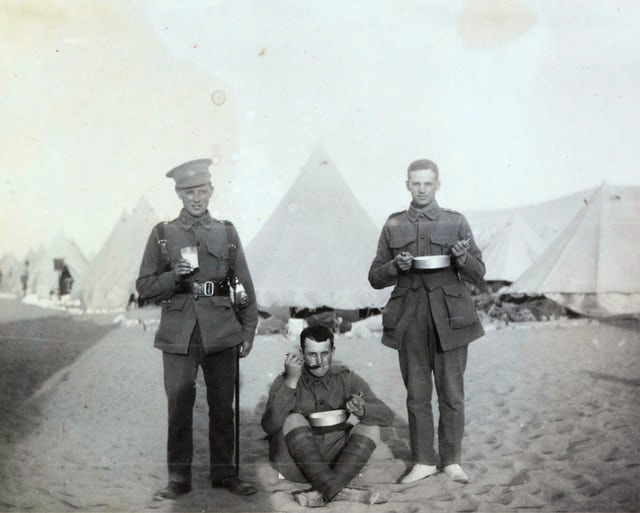

In [18]:
output_img = linearContrast(img)
output_img.save('img_out/output_soldier.jpg')
output_img

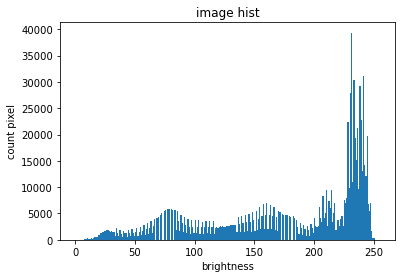

<Figure size 432x288 with 0 Axes>

In [19]:
histPlotImage(output_img)
plt.savefig('img_out/output-img-hist.png', dpi=300)

In [20]:
# preparing_img = Image.fromarray(np.array(output_img)//4+100)
# preparing_img.save('img_out/preparing_soldier.jpg')

In [21]:
# histPlotImage(preparing_img)

In [22]:
def preparingImg(img: Image.Image)->Image.Image:
    img = np.array(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if np.isin(img[i,j,:],np.arange(100,150,1)).any():
                img[i,j,:] = 255
            else:
                img[i,j,:] = 0
#     red, green, blue = img.split()
#     red, green, blue = list(map(np.array, [red, green, blue]))
#     output_red = np.where(np.isin(red, np.arange(100,150,1)), 255, 0)
#     output_green = np.where(np.isin(green, np.arange(100,150,1)), 255, 0)
#     output_blue = np.where(np.isin(blue, np.arange(100,150,1)), 255, 0)
#     arr_output = np.uint8(np.dstack((output_red, output_green, output_blue)))
    output_img = Image.fromarray(img)
    return output_img

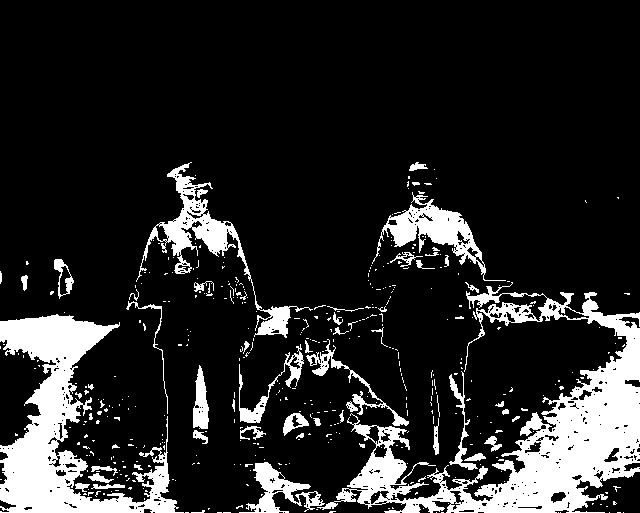

In [23]:
prep_soldeir = preparingImg(output_img)
prep_soldeir.save('preparing_soldir_v2.jpg')
prep_soldeir

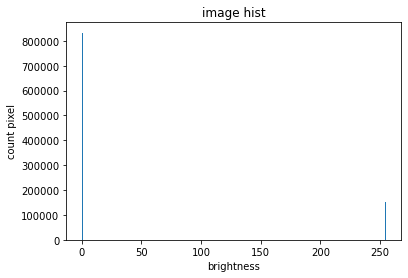

In [24]:
histPlotImage(prep_soldeir)

In [25]:
x = np.linspace(0, 256, dtype=int)
y = np.zeros(len(x))
for i in range(0, len(x)):
    if x[i] in range(100,150):
        y[i] = 255
    else:
        y[i] = 0

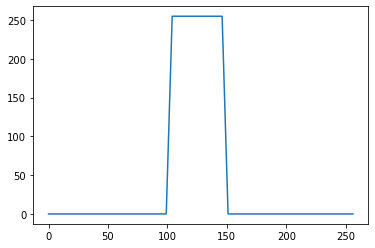

In [26]:
plt.plot(x, y)